In [1]:
import pandas as pd 
import missingno as msno
import numpy as np
from scipy.stats import zscore


In [2]:
from config_GAM2025 import gam_info

import test_functions 
import functions 

In [3]:
# country
pop_size_col = 'Population Size (We are social)'
pop_size_col = 'Population2020'

country_codes_cols = ['PlaceID', pop_size_col]
country_codes = pd.read_excel(f"../../{gam_info['lookup_file']}", sheet_name='CountryID')[country_codes_cols]

# week 
week_tester = pd.read_excel(f"../../{gam_info['lookup_file']}", sheet_name='GAM Period',)
week_tester['w/c'] = pd.to_datetime(week_tester['w/c'])

service_tester = pd.read_excel(f"../../{gam_info['lookup_file']}", sheet_name='ServiceID',)

platform_tester = pd.read_excel(f"../../{gam_info['lookup_file']}", sheet_name='PlatformID',)

In [4]:
# TODO Add tests (recognising all services, countries, platforms) to all the overlap sheets that are used here 
# overlap
overlap_nonHeavy = pd.read_excel("helper/Final Overlaps 2021.xlsx", sheet_name='non heavy')
overlap_nonHeavy = overlap_nonHeavy.rename(columns={'Week': 'WeekNumber_finYear', 
                                                    'Service Code': 'ServiceID', 
                                                    'GeoCode': 'PlaceID'})
# ASK MINNIE WHY THE SHEET HAS MORE THAN ONE VALUE PER SERVICE/PLACE/WEEK
overlap_nonHeavy = overlap_nonHeavy.drop_duplicates(subset=['PlaceID', 'ServiceID', 'WeekNumber_finYear'], 
                                                    keep='first')
overlap_nonHeavy = overlap_nonHeavy.merge(week_tester[['w/c', 'WeekNumber_finYear']], 
                                          on='WeekNumber_finYear', 
                                          how='outer').drop(columns=['WeekNumber_finYear'])

overlap_nonHeavyAdd = pd.read_excel("helper/Final Overlaps 2021.xlsx", sheet_name='non heav additional')
overlap_nonHeavyAdd = overlap_nonHeavyAdd.rename(columns={'GeoCode': 'PlaceID'})

overlap_SocWebOverlap = pd.read_excel("helper/Final Overlaps 2021.xlsx", sheet_name='SocWebOverlap').drop_duplicates()
overlap_SocWebOverlap['PlaceID'] = overlap_SocWebOverlap['PlaceID'].replace('MYT', 'MAY').replace('WLF', 'WFI')
overlap_SocWebOverlap = overlap_SocWebOverlap.merge(country_codes, on='PlaceID', how='left')

overlap_referral = pd.read_excel("helper/Final Overlaps 2021.xlsx", sheet_name='Referrals').drop_duplicates()
overlap_referral = overlap_referral.rename(columns={'Week Number': 'WeekNumber_finYear', 
                                                    'ServiceID': 'ServiceID', 
                                                    'Country Code': 'PlaceID',
                                                    '% Social': '%_AnalyticsSocialOverlap'})
overlap_referral = overlap_referral.merge(week_tester[['w/c', 'WeekNumber_finYear']], 
                                          on='WeekNumber_finYear', 
                                          how='outer').drop(columns=['WeekNumber_finYear'])

analytics_socialOverlap = 0.397690544

cols = ['PlaceID', 'digiGAM_FOA_WT-']
africa_dedup_countries = pd.read_excel(f"../../{gam_info['lookup_file']}", sheet_name='CountryID')[cols]


# calculate CSS

## import data 

### site

In [5]:
cols = ['YearGAE', 'w/c', 'ServiceID', 'PlatformID', 'PlaceID', 'Reach']
site_weekly_df = pd.read_csv("../data/singlePlatform/output/weekly/GAM2025_site_reach_weekly.csv")[cols]
site_weekly_df['w/c'] = pd.to_datetime(site_weekly_df['w/c'])
site_weekly_df.head()

test_columns = {
    'PlaceID': country_codes['PlaceID'].tolist(),
    'w/c': week_tester['w/c'].tolist(),
    'ServiceID': service_tester['ServiceID'].tolist(),
    'PlatformID': platform_tester['PlatformID'].tolist()
}

for i, (column, allowed_values) in enumerate(test_columns.items(), start=1):
    label = f"total_digi_{i}"
    test_functions.test_allowed_values(site_weekly_df, column, allowed_values, label, 'site_ingest')


Fail - found not allowed values
...updating logbook...

Pass - found only allowed values
...updating logbook...

Pass - found only allowed values
...updating logbook...

Pass - found only allowed values
...updating logbook...



In [6]:
# are there any duplicates?
print(site_weekly_df.shape)
site_weekly_df.drop_duplicates().shape

(1085576, 6)


(1085576, 6)

<Axes: >

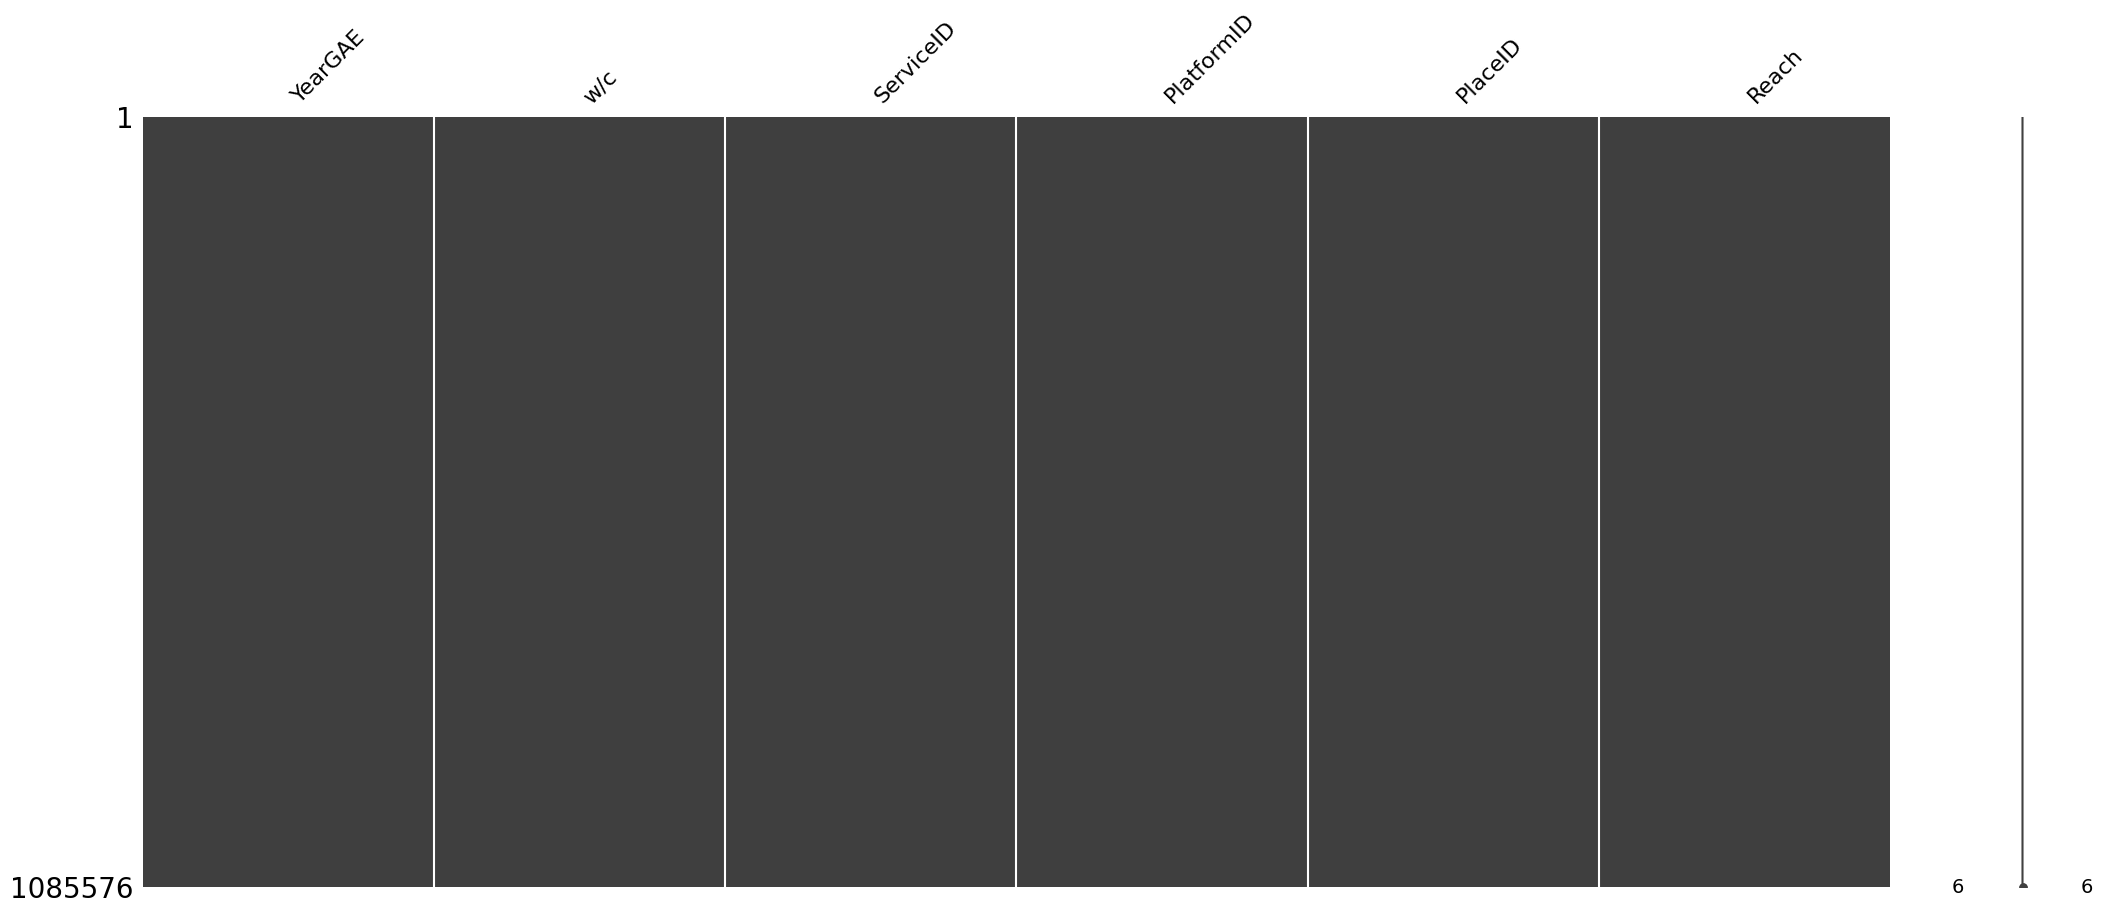

In [7]:
# are any entries with missing values? 
msno.matrix(site_weekly_df)

### social

In [110]:
social_weekly_df

,YearGAE,w/c,ServiceID,PlaceID,Reach
0,2025,2024-04-01,AFA,AFG,128.941558
1,2025,2024-04-01,AMH,AFG,60.770710
2,2025,2024-04-01,ARA,AFG,1734.448703
3,2025,2024-04-01,AZE,AFG,44.804629
4,2025,2024-04-01,BEN,AFG,622.201423
...,...,...,...,...,...
477206,2025,2025-03-24,ALL,WFI,0.745002
477207,2025,2025-03-24,ALL,YEM,394334.151988
477208,2025,2025-03-24,ALL,ZAI,129122.801669
477209,2025,2025-03-24,ALL,ZAM,192502.244905


In [111]:
social_weekly_df = pd.read_csv("../data/interim/mk_wsc_social_weekly_data.csv")

social_weekly_df['Service Code'] = social_weekly_df['Service Code'].replace("FAR", "PER") 
social_weekly_df = social_weekly_df.rename(columns={'Week Number': 'WeekNumber_finYear',
                                                    'Country Code': 'PlaceID',
                                                    'Service Code': 'ServiceID',
                                                    'Platform Code': 'PlatformID',})
social_weekly_df = social_weekly_df.merge(week_tester[['w/c', 'WeekNumber_finYear']], 
                                          on='WeekNumber_finYear', how='outer').drop(columns=['WeekNumber_finYear'])
social_weekly_df['YearGAE'] = gam_info['YearGAE']
social_weekly_df = social_weekly_df[['ServiceID', 'PlaceID', 'PlatformID', 'w/c', 'YearGAE', 'Reach']]


test_columns = {
    'PlaceID': country_codes['PlaceID'].tolist(),
    'w/c': week_tester['w/c'].tolist(),
    'ServiceID': service_tester['ServiceID'].tolist(),
    'PlatformID': platform_tester['PlatformID'].tolist()
}

for i, (column, allowed_values) in enumerate(test_columns.items(), start=5):
    label = f"total_digi_{i}"
    test_functions.test_allowed_values(social_weekly_df, column, allowed_values, label, 'social_ingest')
social_weekly_df.head()

/var/folders/gz/pq5c3fbj5rs1tz_5w1hycq4h0000gn/T/ipykernel_56513/1686071420.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  social_weekly_df = pd.read_csv("../data/interim/mk_wsc_social_weekly_data.csv")


Pass - found only allowed values
...updating logbook...

Pass - found only allowed values
...updating logbook...

Pass - found only allowed values
...updating logbook...

Pass - found only allowed values
...updating logbook...



,ServiceID,PlaceID,PlatformID,w/c,YearGAE,Reach
0,AFA,AFG,WSC,2024-04-01,2025,128.941558
1,AMH,AFG,WSC,2024-04-01,2025,60.770710
2,ARA,AFG,WSC,2024-04-01,2025,1734.448703
3,AZE,AFG,WSC,2024-04-01,2025,44.804629
4,BEN,AFG,WSC,2024-04-01,2025,622.201423


### combine site & social

In [112]:
site_social_df = pd.concat([site_weekly_df, social_weekly_df])
site_social_df['w/c'] = pd.to_datetime(site_social_df['w/c'])
site_social_df = site_social_df.pivot(index=['YearGAE', 'w/c', 'ServiceID', 'PlaceID'],
                                      columns="PlatformID", values="Reach").fillna(0).reset_index()
site_social_df.sample(5)

PlatformID,YearGAE,w/c,ServiceID,PlaceID,WDI,WIN,WSC,WWW
2591,2025,2024-04-01,EN2,LES,2778.278049,0.000000,2768.830146,2784.315277
247520,2025,2024-09-09,INO,UKR,9.671975,3.352602,13.160268,13.504355
68463,2025,2024-05-13,KRW,BOL,0.904833,0.000000,0.000000,0.904833
55891,2025,2024-05-06,ENW,BIO,1.732044,0.000000,1.403287,1.732044
461128,2025,2025-01-27,SOM,IRE,488.695838,0.000000,204.533197,488.695838


In [113]:
non_MA_WOR = site_social_df[~site_social_df['ServiceID'].isin(['WOR', 'MA-'])]

exclude_ids = ['WOR', 'MA-', 
               'ENG', 'EN2', 'ENW', 
               'ANW', 'TOT', 'AX2', 'ANY', 'ALL', ]
ws_site_social = site_social_df[~site_social_df['ServiceID'].isin(exclude_ids)]


ma_wor_df = site_social_df[site_social_df['ServiceID'].isin(['WOR', 'MA-'])]


## WSL

### determine & handle outlier

In [114]:
# Group by 'service' and 'w/c', summing the numerical columns
grouped = ws_site_social.groupby(['ServiceID', 'w/c'], as_index=False)[['WSC', 'WDI']].sum()

# Compute Z-scores within each 'service' group
def compute_zscores(group):
    group['WSC_z'] = (group['WSC'] - group['WSC'].mean()) / group['WSC'].std(ddof=1)
    group['WDI_z'] = (group['WDI'] - group['WDI'].mean()) / group['WDI'].std(ddof=1)
    return group

outlier_df = grouped.groupby('ServiceID', group_keys=False).apply(compute_zscores)
outlier_df = outlier_df[(outlier_df['WSC_z'] > 1.96) | (outlier_df['WDI_z'] > 1.96)]
outlier_df = outlier_df[['w/c', 'ServiceID']]


/var/folders/gz/pq5c3fbj5rs1tz_5w1hycq4h0000gn/T/ipykernel_56513/2915995770.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  outlier_df = grouped.groupby('ServiceID', group_keys=False).apply(compute_zscores)


In [115]:
# 2. Identify outliers and non-outliers
merged_outlier = ws_site_social.merge(outlier_df, on=['w/c', 'ServiceID'], how='outer', 
                                   indicator=True)


In [116]:
outliers = merged_outlier[merged_outlier['_merge'] == 'both']
print(outliers.shape)

# 3. Check for overlap with non-heavy overlaps
outliers = outliers.drop(columns=['_merge'])
outliers = outliers.merge(overlap_nonHeavy.rename(columns={'Non Heavy - Month': 'NonHeavy1'}), 
                                 on=['ServiceID', 'PlaceID', 'w/c'], 
                                 how='left')
print(outliers.shape)

# 4. Add additional overlap info
outliers = outliers.merge(overlap_nonHeavyAdd.rename(columns={'Avg_%': 'NonHeavy2'}), 
                                        on='PlaceID', 
                                        how='left')
print(outliers.shape)

outliers['NonHeavy3'] = 0.593887
outliers['%_NonHeavy'] = np.where(outliers['NonHeavy1'].notna(), 
                                         outliers['NonHeavy1'],
                                         np.where(outliers['NonHeavy2'].notna(), 
                                                  outliers['NonHeavy2'], 
                                                  outliers['NonHeavy3']))
outliers = outliers.drop(columns=['NonHeavy1', 'NonHeavy2', 'NonHeavy3'])

outliers['NonHeavyWDI'] = outliers['WDI'] * outliers['%_NonHeavy']
outliers['HeavyWDI'] = outliers['WDI'] * (1-outliers['%_NonHeavy'])

outliers['NonHeavyWSC'] = outliers['WSC'] * outliers['%_NonHeavy']
outliers['HeavyWSC'] = outliers['WSC'] * (1-outliers['%_NonHeavy'])

# be aware - PCN is missing 
outliers = outliers.merge(overlap_SocWebOverlap, on='PlaceID', how='left')
print(outliers.shape)

# Apply to your DataFrame
outliers = functions.sainsbury_formula(outliers, 'Population 2020', ['NonHeavyWDI', 'NonHeavyWSC'], 'NonHeavy_WSC_WDI')

# BUFFER
def compute_heavy_combined(row):
    heavy_wdi = row['HeavyWDI']
    heavy_wsc = row['HeavyWSC']
    social_inc = row['Social Incremental']
    site_inc = row['Web']
    
    if heavy_wdi > heavy_wsc:
        return heavy_wdi + heavy_wsc * social_inc
    else:
        return heavy_wsc + heavy_wdi * site_inc

# Apply to your DataFrame
outliers['BUFFER_Heavy_WSC_WDI'] = outliers.apply(compute_heavy_combined, axis=1)
outliers['Buffer_WSC_WDI'] = outliers['NonHeavy_WSC_WDI'] + outliers['BUFFER_Heavy_WSC_WDI']
outliers['Heavy_WSC_WDI'] = (outliers['HeavyWSC'] + outliers['HeavyWDI']) * outliers['Own Web & Social Factor']
outliers['WSC_WDI'] = outliers['Heavy_WSC_WDI'] + outliers['NonHeavy_WSC_WDI']

def compute_wsc_wdi_buffer(row):
    wsc_wdi = row['WSC_WDI']
    wdi = row['WDI']
    wsc = row['WSC']
    buffer = row['Buffer_WSC_WDI']
    
    if wsc_wdi < wdi:
        return buffer
    elif wsc_wdi < wsc:
        return buffer
    else:
        return wsc_wdi

# Apply to your DataFrame
outliers['WSC_WDI'] = outliers.apply(compute_wsc_wdi_buffer, axis=1)
outliers = outliers[['PlaceID', 'ServiceID', 'YearGAE', 'w/c', 
                     'WDI', 'WIN', 'WSC', 'WWW', 
                     'WSC_WDI']]

(31377, 9)
(31377, 9)
(31377, 10)
(31377, 30)


### handle non outlier

In [117]:
no_outliers = merged_outlier[merged_outlier['_merge'] == 'left_only']
overlap_cols = ['PlaceID', pop_size_col, 'Own Web & Social Factor', 'Web', 'Social Incremental']
no_outliers = no_outliers.merge(overlap_SocWebOverlap[overlap_cols], on='PlaceID', how='left')


def compute_web_social_value(row):
    wdi = row['WDI']
    wsc = row['WSC']
    factor = row['Own Web & Social Factor']
    
    if wsc == 0:
        return wdi
    elif wdi == 0:
        return wsc
    else:
        return (wdi + wsc) * factor

# Apply to your DataFrame
no_outliers['NewTapestryDigi'] = no_outliers.apply(compute_web_social_value, axis=1)

def compute_web_social_mix(row):
    wdi = row['WDI']
    wsc = row['WSC']
    web = row['Web']
    social_inc = row['Social Incremental']
    
    if wsc > wdi:
        return wsc + wdi * web
    else:
        return wdi + wsc * social_inc

# Apply to your DataFrame
no_outliers['BufferForTapestry'] = no_outliers.apply(compute_web_social_mix, axis=1)


def compute_tapestry_buffer(row):
    digi = row['NewTapestryDigi']
    wsc = row['WSC']
    wdi = row['WDI']
    buffer = row['BufferForTapestry']
    
    if digi < wsc:
        return buffer
    elif digi < wdi:
        return buffer
    else:
        return digi

# Apply to your DataFrame

no_outliers['WSC_WDI'] = no_outliers.apply(compute_tapestry_buffer, axis=1)
no_outliers = no_outliers[['PlaceID', 'ServiceID', 'YearGAE', 'w/c',
                           'WDI', 'WIN', 'WSC', 'WWW',
                           'WSC_WDI']]

### calculate WT-

In [118]:
ws_site_social_postOutlier = pd.concat([outliers, no_outliers])
ws_site_social_postOutlier['%_OverlapWithOwnSite'] = ((ws_site_social_postOutlier['WSC'] +
                                                     ws_site_social_postOutlier['WDI']) -
                                                    ws_site_social_postOutlier['WSC_WDI'])/ws_site_social_postOutlier['WDI']

ws_site_social_postOutlier = ws_site_social_postOutlier.merge(overlap_referral, 
                                                              on=['PlaceID', 'ServiceID', 'w/c'],
                                                              how='left', indicator=True)

ws_site_social_postOutlier['%_AnalyticsSocialOverlap'] = ws_site_social_postOutlier['%_AnalyticsSocialOverlap'].fillna(analytics_socialOverlap)


def compute_site_overlap_adjustment(row):
    site_overlap = row['%_OverlapWithOwnSite']
    analytics_overlap = row['%_AnalyticsSocialOverlap']
    wdi = row['WDI']
    wsc = row['WSC']
    wsc_wdi = row['WSC_WDI']
    
    if site_overlap < analytics_overlap:
        return (wdi + wsc) - (wdi * analytics_overlap)
    else:
        return wsc_wdi
ws_site_social_postOutlier['Pegged_WSC_WDI'] = ws_site_social_postOutlier.apply(compute_site_overlap_adjustment, axis=1)

def flag_pegged_wsc_wdi(row):
    pegged = row['Pegged_WSC_WDI']
    wsc = row['WSC']
    wdi = row['WDI']
    
    if pegged < wsc:
        return "FLAG"
    elif pegged < wdi:
        return "FLAG"
    else:
        return "FINE"
ws_site_social_postOutlier['Check1'] = ws_site_social_postOutlier.apply(flag_pegged_wsc_wdi, axis=1)
print(ws_site_social_postOutlier['Check1'].value_counts())

def resolve_check_flag(row):
    check = row['Check1']
    wsc_wdi = row['WSC_WDI']
    pegged = row['Pegged_WSC_WDI']
    
    if check == "FLAG":
        return wsc_wdi
    else:
        return pegged

# Apply to your DataFrame
ws_site_social_postOutlier['final_WSC_WDI'] = ws_site_social_postOutlier.apply(resolve_check_flag, axis=1)

def compute_incremental_partner_reach(row):
    www = row['WWW']
    win = row['WIN']
    wdi = row['WDI']
    final_wsc_wdi = row['final_WSC_WDI']
    
    if www > win:
        return (www - wdi) + final_wsc_wdi
    elif win == 0:
        return final_wsc_wdi
    elif final_wsc_wdi == 0:
        return win
    else:
        return (www - wdi) + final_wsc_wdi

# Apply to your DataFrame
ws_site_social_postOutlier['Reach'] = ws_site_social_postOutlier.apply(compute_incremental_partner_reach, axis=1)

Check1
FINE    329882
FLAG     98311
Name: count, dtype: int64


In [119]:
cols = ['YearGAE', 'w/c', 'ServiceID', 'PlaceID', 'Reach']
weekly_ws_df =  ws_site_social_postOutlier[cols]

In [120]:

weekly_ws_df[(weekly_ws_df['PlaceID'] == 'AGU') & 
    (weekly_ws_df['w/c'] == '2024-04-29') & 
    (weekly_ws_df['ServiceID'] == 'FAR') 
    ]

,YearGAE,w/c,ServiceID,PlaceID,Reach


### annual average

In [121]:
annual_ws_df = weekly_ws_df.groupby(['YearGAE', 'ServiceID', 'PlaceID'])['Reach'].sum().reset_index()
annual_ws_df['Reach'] = annual_ws_df['Reach'] / gam_info['number_of_weeks'] 
annual_ws_df.head()

,YearGAE,ServiceID,PlaceID,Reach
0,2025,AFA,AFG,317.719140
1,2025,AFA,ALA,0.018762
2,2025,AFA,ALB,0.747131
3,2025,AFA,ALG,119.560583
4,2025,AFA,AND,0.055058


## MA & Studios

In [122]:
ma_wor_df = site_social_df[site_social_df['ServiceID'].isin(['WOR', 'MA-'])]
ma_wor_df = ma_wor_df.merge(overlap_SocWebOverlap, on='PlaceID' , how='left')

ma_wor_df = functions.sainsbury_formula(ma_wor_df, pop_size_col, ['WSC', 'WWW'], 'Reach')

cols = ['YearGAE', 'w/c', 'ServiceID', 'PlaceID', 'Reach']
weekly_ma_wor_df = ma_wor_df[cols]

annual_ma_wor_df = ma_wor_df.groupby(['YearGAE', 'ServiceID', 'PlaceID'])['Reach'].sum().reset_index()
annual_ma_wor_df['Reach'] = annual_ma_wor_df['Reach'] / gam_info['number_of_weeks'] 


## aggregated services

In [123]:
weekly_df = pd.concat([weekly_ws_df, weekly_ma_wor_df])
#weekly_df = weekly_df.merge(country_codes, on='PlaceID', how='left')
weekly_df.head()

,YearGAE,w/c,ServiceID,PlaceID,Reach
0,2025,2024-04-01,KYR,AFG,62.871421
1,2025,2024-04-01,KYR,ALB,8.228680
2,2025,2024-04-01,KYR,ALG,5.485787
3,2025,2024-04-01,KYR,ANG,1.249530
4,2025,2024-04-01,KYR,ANT,0.685723


In [124]:
def compute_combined_reach(df, services, label, pop_size_col, country_codes, deal_with_zero=True, 
                          calc_type='sainsbury'):
    """
    Filters, merges, aggregates, and applies the Sainsbury formula to compute combined reach.

    Parameters:
    df (pd.DataFrame): Source DataFrame with weekly reach data.
    services (list): List of ServiceIDs to include.
    label (str): Label to assign to the resulting ServiceID.
    pop_size_col (str): Column name for population size.
    country_codes (pd.DataFrame): Mapping DataFrame for PlaceID enrichment.
    deal_with_zero (bool): Whether to apply shortcut logic in the formula.

    Returns:
    pd.DataFrame: Aggregated and transformed DataFrame with combined reach.
    """
    filtered_df = df[df['ServiceID'].isin(services)].merge(country_codes, on='PlaceID', how='left')
    
    pivot_df = pd.crosstab(
        index=[filtered_df['PlaceID'], filtered_df[pop_size_col], 
               filtered_df['w/c'], filtered_df['YearGAE']],
        columns=filtered_df['ServiceID'],
        values=filtered_df['Reach'],
        aggfunc='sum'
    ).reset_index().fillna(0)

    if calc_type == 'add':
        pivot_df['Reach'] = pivot_df[services].sum(axis=1)
    elif calc_type == 'sainsbury':
        pivot_df = functions.sainsbury_formula(pivot_df, pop_size_col, services, 
                                               'Reach', deal_with_zero=deal_with_zero)
        
    else: 
        print('error')
        
    pivot_df['ServiceID'] = label
    return pivot_df[['YearGAE', 'w/c', 'ServiceID', 'PlaceID', 'Reach']]

### ENW

In [125]:
# Usage
enw_services = ['FOA', 'WSE']
enw_df = compute_combined_reach(weekly_df, enw_services, 'ENW', pop_size_col, country_codes)

### ENG

In [126]:
# Usage
eng_services = ['GNL', 'WSE']
eng_df = compute_combined_reach(weekly_df, eng_services, 'ENG', pop_size_col, country_codes)

### EN2

In [127]:

en2_services = ['ENG', 'WOR']
en2_df = compute_combined_reach(pd.concat([weekly_df, eng_df]), en2_services, 'EN2', pop_size_col, country_codes)


### AX2

In [129]:
ax2_services = [
    'AFA','AMH','ARA','AZE','BEN','BUR','DAR','ECH','ELT','PER','FRE','GUJ','HAU','HIN','IGB','INO',
    'KOR','KRW','KYR','MAN','MAR','NEP','PAS','PDG','POR','PUN','RUS','SER','SIN','SOM','SPA','SWA',
    'TAM','TEL','THA','TIG','TUR','UKR','URD','UZB','VIE','YOR', 'FOA', 'UKPS'
]

ax2_df = weekly_df[weekly_df['ServiceID'].isin(ax2_services)].merge(country_codes, on='PlaceID', how='left')
ax2_df = pd.crosstab(
                                        index = [ ax2_df['PlaceID'], 
                                                  ax2_df[pop_size_col], 
                                                  ax2_df['w/c'],
                                                  ax2_df['YearGAE']],
                                        columns = ax2_df['ServiceID'],
                                        values =  ax2_df['Reach'],
                                        aggfunc='sum'
                                    ).reset_index()
ax2_df = ax2_df.fillna(0)

temp2 = ax2_df.merge(africa_dedup_countries, on='PlaceID', how='outer')
africa_df = temp2[~temp2['digiGAM_FOA_WT-'].isna()]
nonAfrica_df = temp2[temp2['digiGAM_FOA_WT-'].isna()]

# Apply the logic row-wise
def compute_value(row):
    others_sum = sum(row.get(code, 0) for code in ax2_services)
    if row['FOA'] > others_sum:
        return row['FOA'] + 0.60745497 * others_sum
    else:
        return others_sum + row['FOA'] * 0.60745497

africa_df['Reach'] = africa_df.apply(compute_value, axis=1)
nonAfrica_df = functions.sainsbury_formula(nonAfrica_df, 'Population2020', ax2_services, 'Reach')
ax2_df = pd.concat([africa_df, nonAfrica_df])
ax2_df['ServiceID'] = 'AX2'
ax2_df = ax2_df[['YearGAE', 'w/c', 'ServiceID', 'PlaceID', 'Reach']]

ax2_df.head()

/var/folders/gz/pq5c3fbj5rs1tz_5w1hycq4h0000gn/T/ipykernel_56513/3509442960.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  africa_df['Reach'] = africa_df.apply(compute_value, axis=1)
/Users/brunsd01/BBC Dropbox/Domi Bruns/Audience Insight/GAM 2025/7. GAM25_calculation/3 DigiGAM/code/functions.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return (1 - product) * population


,YearGAE,w/c,ServiceID,PlaceID,Reach
208,2025.0,2024-04-01,AX2,ALG,599239.801584
209,2025.0,2024-04-08,AX2,ALG,942941.354270
210,2025.0,2024-04-15,AX2,ALG,967883.807429
211,2025.0,2024-04-22,AX2,ALG,909775.307525
212,2025.0,2024-04-29,AX2,ALG,719608.722626


### ANW

In [130]:

anw_services = ['AX2', 'WSE']
anw_df = compute_combined_reach(pd.concat([weekly_df, ax2_df]), anw_services, 'ANW', 
                                pop_size_col, country_codes)


### ANY

In [131]:

any_services = ['ANW', 'GNL']
any_df = compute_combined_reach(pd.concat([weekly_df, anw_df]), any_services, 'ANY', 
                                pop_size_col, country_codes)


### TOT

In [132]:

tot_services = ['ANY', 'MA-']
tot_df = compute_combined_reach(pd.concat([weekly_df, any_df]), tot_services, 'TOT', 
                                pop_size_col, country_codes, calc_type='add')

### ALL

In [133]:

all_services = ['TOT', 'WOR']
all_df = compute_combined_reach(pd.concat([weekly_df, tot_df]), all_services, 'ALL', 
                                pop_size_col, country_codes, calc_type='add')

## finalising 

In [137]:
final_weekly_df = pd.concat([weekly_ws_df, weekly_ma_wor_df, enw_df, eng_df, en2_df, ax2_df, anw_df,
                     any_df, tot_df, all_df])

final_weekly_df['PlatformID'] = 'CSS'

final_weekly_df.to_csv(f"../data/combinePlatforms/{gam_info['file_timeinfo']}_weekly_WT-.csv", 
                       index=None)

In [141]:
final_annual_df = final_weekly_df.groupby(['YearGAE', 'ServiceID', 'PlatformID', 'PlaceID'])['Reach'].sum().reset_index()
final_annual_df['Reach'] = final_annual_df['Reach'] / gam_info['number_of_weeks']

final_annual_df.to_csv(f"../data/combinePlatforms/{gam_info['file_timeinfo']}_annual_WT-.csv", 
                       index=None)

# combine platforms

## import data

In [21]:
cols = ['YearGAE', 'ServiceID', 'PlatformID', 'PlaceID', 'Reach']

In [26]:
podcast_df = pd.read_excel("../data/singlePlatform/output/GAM2025_podcast_reach_annual.xlsx")
podcast_df['YearGAE'] = gam_info['YearGAE']
podcast_df = podcast_df[cols]
podcast_df.head()

,YearGAE,ServiceID,PlatformID,PlaceID,Reach
0,2025,ALL,DPO,AFG,1100.192308
1,2025,ALL,DPO,AGU,55.615385
2,2025,ALL,DPO,ALA,76.250000
3,2025,ALL,DPO,ALB,1381.211538
4,2025,ALL,DPO,ALG,6696.730769


In [23]:
site_df = pd.read_excel("../data/singlePlatform/output/GAM2025_site_reach_annual.xlsx", index_col=0)
site_df = site_df[cols]
site_df.head()

Index(['YearGAE', 'ServiceID', 'PlatformID', 'PlaceID', 'Reach'], dtype='object')

In [24]:
# created from platform in 6.
social_wsc_df = pd.read_csv("../data/interim/mk_wsc_social_data.csv")
social_wsc_df = social_wsc_df.rename(columns={
    'Country Code': 'PlaceID',
    'Platform Code': 'PlatformID',
    'Service Code': 'ServiceID'
})
social_wsc_df['YearGAE'] = gam_info['YearGAE']
social_wsc_df = social_wsc_df[cols]
social_wsc_df.head()

,YearGAE,ServiceID,PlatformID,PlaceID,Reach
0,2025,AFA,WSC,AFG,315.009163
1,2025,ALL,WSC,AFG,812816.944793
2,2025,AMH,WSC,AFG,126.479997
3,2025,ANW,WSC,AFG,730843.560514
4,2025,ANY,WSC,AFG,806889.733922


In [25]:
# created from dataset per platform file in 5.
social_platforms_df = pd.read_csv("../data/interim/mk_platforms_social_data.csv")
social_platforms_df = social_platforms_df[cols]
social_platforms_df.head()

,YearGAE,ServiceID,PlatformID,PlaceID,Reach
0,2025,ALL,TWI,AFG,12569.355007
1,2025,ANW,TWI,AFG,12569.355007
2,2025,ANY,TWI,AFG,12569.355007
3,2025,AX2,TWI,AFG,12569.355007
4,2025,AXE,TWI,AFG,12569.355007


In [42]:
wt_df = pd.read_csv(f"../data/combinePlatforms/{gam_info['file_timeinfo']}_annual_WT-.csv")[cols]
wt_df.head()

,YearGAE,ServiceID,PlatformID,PlaceID,Reach
0,2025,AFA,CSS,AFG,317.719140
1,2025,AMH,CSS,AFG,126.965056
2,2025,ARA,CSS,AFG,7238.286464
3,2025,AZE,CSS,AFG,209.681125
4,2025,BEN,CSS,AFG,1267.685458


# combine 

In [43]:
sources = {'pod': podcast_df, 
           'site': site_df, 
           'platform': social_platforms_df, 
           'wsc': social_wsc_df,
           'wt': wt_df}

def far_per_test(df):
    temp = df[df['ServiceID'].isin(['PER', 'FAR'])]
    display(temp.ServiceID.value_counts())
    if len(temp) > 0:
        df['ServiceID'] = df['ServiceID'].replace('FAR', 'PER')
    temp = df[df['ServiceID'].isin(['PER', 'FAR'])]
    display(temp.ServiceID.value_counts())
    return df

for name, source in sources.items():
    print(f"\n{name}")
    sources[name] = far_per_test(source)

digital_df = pd.concat(sources.values())

digital_df = digital_df[digital_df['ServiceID'] != 'AXE']



pod


ServiceID
PER    368
Name: count, dtype: int64

ServiceID
PER    368
Name: count, dtype: int64


site


ServiceID
PER    518
Name: count, dtype: int64

ServiceID
PER    518
Name: count, dtype: int64


platform


ServiceID
PER    342
Name: count, dtype: int64

ServiceID
PER    342
Name: count, dtype: int64


wsc


ServiceID
PER    232
Name: count, dtype: int64

ServiceID
PER    232
Name: count, dtype: int64


wt


ServiceID
FAR    233
Name: count, dtype: int64

ServiceID
PER    233
Name: count, dtype: int64

(82695, 5)

# store

In [49]:
digital_df.to_csv(f"../data/combinePlatforms/{gam_info['file_timeinfo']}_digital_gam.csv")